<a href="https://colab.research.google.com/github/ReginaDelcourt/PosDataScience/blob/main/MVP_ML__Water_RDelcourt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MVP - Sprint II - Machine Learning**
## **Regina Delcourt**

### Problema de Classificação



####**Estrutura**
#####O notebook está dividido da seguinte maneira:
#####1.   Definição do Problema
#####1.1 - Configuração
#####1.2 - Carregamento do Dataset
#####2. Preparação dos Dados
#####2.1 - Fazendo um pré-tratamento dos dados
#####2.2 - Definição de atributos e classes
#####2.3 - Seleção de Atributos
#####2.4 - Separação em conjunto de treino e teste
#####3. Modelagem e Inferência
#####3.1 - Criação e avaliação de modelos: linha base
#####3.2 - Criação e Avaliação de modelos: dados padronizados e normalizados
#####3.3 - Otimização dos hiperparâmetros
#####4. Finalização do Modelo e Avaliação de Resultados
#####5. Simulando a Aplicação do Modelo em Dados Não Vistos
#####6. Conclusão

####**Créditos**
#####O notebook foi adaptado do material de aula e documentado por: **Regina Delcourt**


####**1. Definição do Problema**
#####*Objetivo*: Resolver um problema de classificação, onde, por meio de dados de parâmetros de qualidade da água, seja possível indicar se o consumo da água é seguro ou não seguro.
#####*Definição do problema*: Um modelo de aprendizado de máquina relacionado à qualidade da água pode permitir, por exemplo, que as concessionárias de água monitorem a qualidade da água de forma a garantir que a água seja segura para consumo e outros usos, reduzindo o risco de contaminação e doenças, bem como melhorando a qualidade de vida geral daqueles que dependem da água para suas necessidades diárias.
#####*Sobre o Dataset*: O conjunto de dados utilizados no presente trabalho, foi criado a partir de dados imaginários da qualidade da água em um ambiente urbano e obtido no repositório Kaggle (https://www.kaggle.com/datasets/mssmartypants/water-quality).
#####A base de dados é composta por 20 atributos, relacionados à parâmetros da água, mais um atributo de classe. Todos os atributos são variáveis numéricas e considerados perigosos à saúde humana conforme indicado: alumínio (> 2,8); amônia (> 32,5); arsênico (> 0,01); bário (> 2); cádmio (> 0,005); cloramina (> 4); cromo (> 0,1); cobre (> 1,3); fluoreto (> 1,5); bactérias (> 0); vírus (> 0); chumbo (> 0,015); nitratos (> 10); nitritos (> 1); mercúrio (> 0,002); perclorato (> 56); rádio (> 5); selênio (> 0,5); prata (> 0,1); urânio (> 0,3); is_safe - atributo de classe {0 - não seguro, 1 - seguro}.




####1.1 - Configuração para que os warnings não sejam exibidos importação dos pacotes utilizados neste notebook

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)

# Imports para problemas de classificação

from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Imports dos Recursos Avançados Aplicados ao Aprendizado Supervisionado

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

####1.2 - Carregamento do dataset a partir de um arquivo disponível no git-hub e exibição das primeiras linhas do dataset

In [2]:
# carga do dataset através de um arquivo
# url a importar
url_dados = 'https://raw.githubusercontent.com/ReginaDelcourt/PosDataScience/main/waterQuality1.csv'

# carga do dataset através do csv
water = pd.read_csv(url_dados)

# exibe as 5 primeiras linhas
water.head()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


####**2. Preparação dos Dados**
#####*Objetivo*: Realizar operações de preparação dos dados.



####2.1 - Fazendo um pré-tratamento dos dados: verificando presença de objetos, eliminando linhas que tenham algum valor missing, com erro, e convertendo objetos em números inteiros.

In [3]:
#verificando a presença de objetos
water.info()

# Imprimindo Alteração no Console
print(water)

#verificando a presença de dados vazios
print(f'Number of NaNs values: {water.isna().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [4]:
# eliminando linhas que tenham algum valor missing, com erro, e convertendo objetos em int
water = water.replace(['#NUM!'], 0)
water['ammonia'] = water['ammonia'].astype(float)
water['is_safe'] = water['is_safe'].astype(int)
water = water.dropna(how='any')
water = water.replace(np.nan, 0)

####2.2 - Definição de atributos e classes


In [5]:
# tamanho do conjunto de teste
#test_size = 0.30
#seed = 7 # semente aleatória

# Separação em bases de treino e teste (holdout)
array = water.values
X = array[:,0:20] # atributos
y = array[:,20] # classe (is_safe)

####2.3 - Seleção de Atributos (Feature Selection)
#####Objetivo: Refinar a quantidade de atributos de nossa base.


In [6]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", water.columns[0:20])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')
[0.2362222  0.03809593 0.07745024 0.02947522 0.08630763 0.04630019
 0.04254007 0.02573933 0.02360885 0.03646862 0.03733981 0.02546441
 0.03399781 0.03184147 0.0243734  0.07675416 0.02908949 0.0237711
 0.04124684 0.03391324]


#####Realizando-se a seleção de atributos com o método ExtraTrees, observou-se 4 atributos com maior pontuação. Dessa forma, para os outros métodos de seleção de atributos (SelectKBest e Eliminação Recursiva) serão considerados apenas 4 atributos.

In [7]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", water.columns[0:20])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features = water.columns[0:20]))


Número original de atributos: 20

Número reduzido de atributos: 4

Atributos Originais: Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')

Scores dos Atributos Originais: [1.004e+03 4.120e+00 1.235e+02 6.665e+01 5.609e+02 2.891e+02 2.752e+02
 6.985e+00 3.501e-01 3.880e+00 7.581e+01 8.131e-01 4.175e+01 1.764e+01
 1.093e+01 4.625e+01 3.357e+01 7.661e+00 8.555e+01 4.599e+01]

Atributos Selecionados: ['aluminium' 'cadmium' 'chloramine' 'chromium']


In [8]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", water.columns[0:20])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=water.columns[0:20]))

Atributos Originais: Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')

Atributos Selecionados: [False False  True False  True False  True False False False False False
 False False False False False False False  True]

Ranking de atributos: [ 5 15  1 12  1 11  1  8 17  7  3  4 14 10  9 16 13  2  6  1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['arsenic' 'cadmium' 'chromium' 'uranium']


#####Considerando-se os três métodos utilizados de Feature Selection, foram considerados os seguintes atributos como mais relevantes: aluminium, arsenic, cadmium e chromium. Dessa forma, removeremos todos os outros atributos de nossa base.

In [9]:
water_fs = water.drop(columns=['ammonia', 'barium','chloramine',
       'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'])

water_fs.head()

,aluminium,arsenic,cadmium,chromium,is_safe
0,1.65,0.04,0.007,0.83,1
1,2.32,0.01,0.002,0.68,1
2,1.01,0.04,0.008,0.53,0
3,1.36,0.04,0.001,0.03,1
4,0.92,0.03,0.006,0.69,1


#####Ressalta-se, aqui, que foi realizada a modelagem considerando apenas os 4 atributos selecionados. Porém, conforme demonstrado abaixo, foi obtida uma acurácia de 100%, possivelmente relacionada a um overfitting. Dessa forma, para efeito do presente trabalho, foram mantidos todos os atributos originais de nossa base, para a etapa de modelagem e inferência dos modelos.


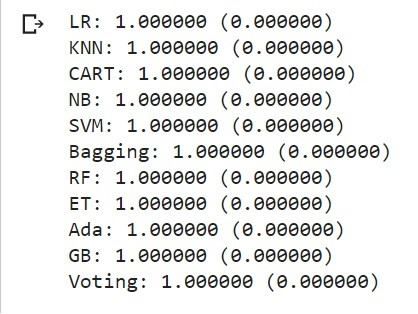

####2.4 - Separação em conjunto de treino e conjunto de teste com o método holdout
#####Utilização de validação cruzada com estratificação e 10 partições.



In [12]:
# tamanho do conjunto de teste
test_size = 0.30
seed = 7 # semente aleatória

# Separação em bases de treino e teste (holdout)
#array = water.values
#X = array[:,0:20] # atributos
#y = array[:,20] # classe (is_safe)

# fazendo a divisão em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # faz a divisão # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'

# Criando os folds para a validação cruzada
# número de folds da validação cruzada
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

###**3. Modelagem e Inferência**


#####*Objetivo*: treinar e avaliar os modelos com melhor desempenho.
#####Iniciamos a etapa de modelagem e inferência, porém não sabemos previamente quais algoritmos performarão bem nesse conjunto de dados. Assim, usaremos a validação cruzada para treinar e avaliar os modelos usando a métrica "acurácia".
#####Primeiramente, iremos avaliar os algoritmos com a configuração padrão de hiperparâmetros da scikit-Learn.
#####Criamos os ensembles e adicionamos na lista de modelos

####3.1 - Criação e avaliação de modelos: linha base

LR: 0.902481 (0.005331)
KNN: 0.877658 (0.008208)
CART: 0.952136 (0.006946)
NB: 0.847468 (0.016580)
SVM: 0.886051 (0.000676)
Bagging: 0.966066 (0.007862)
RF: 0.949278 (0.007365)
ET: 0.913736 (0.007133)
Ada: 0.932667 (0.006183)
GB: 0.958030 (0.007620)
Voting: 0.915164 (0.005825)


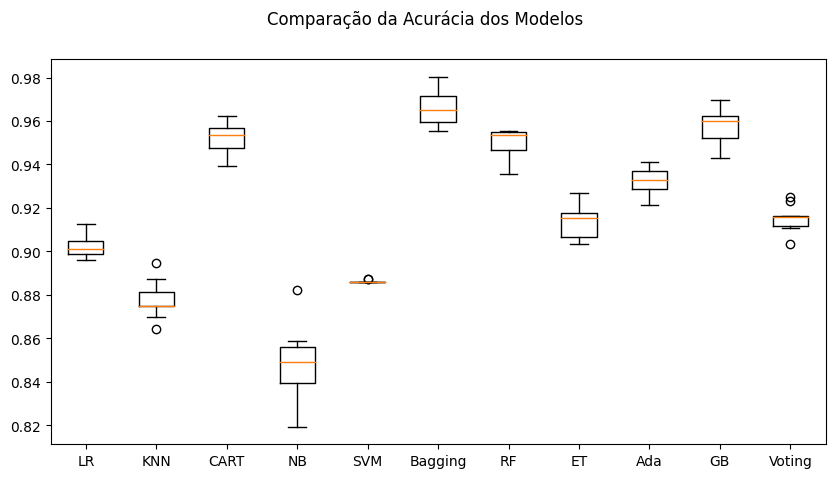

In [13]:
# Modelagem
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,5))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#####Etapa de modelagem e inferência, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original.

####3.2 - Criação e avaliação de modelos: dados padronizados e normalizados


LR-orig: 0.902 (0.005)
KNN-orig: 0.878 (0.008)
CART-orig: 0.952 (0.007)
NB-orig: 0.847 (0.017)
SVM-orig: 0.886 (0.001)
Bag-orig: 0.966 (0.008)
RF-orig: 0.949 (0.007)
ET-orig: 0.914 (0.007)
Ada-orig: 0.933 (0.006)
GB-orig: 0.958 (0.008)
Vot-orig: 0.915 (0.006)
LR-padr: 0.908 (0.005)
KNN-padr: 0.907 (0.011)
CART-padr: 0.952 (0.007)
NB-padr: 0.847 (0.017)
SVM-padr: 0.938 (0.009)
Bag-padr: 0.967 (0.008)
RF-padr: 0.948 (0.007)
ET-padr: 0.911 (0.008)
Ada-padr: 0.933 (0.006)
GB-padr: 0.958 (0.008)
Vot-padr: 0.940 (0.007)
LR-norm: 0.906 (0.005)
KNN-norm: 0.902 (0.013)
CART-norm: 0.951 (0.009)
NB-norm: 0.847 (0.017)
SVM-norm: 0.935 (0.009)
Bag-norm: 0.967 (0.007)
RF-norm: 0.949 (0.007)
ET-norm: 0.911 (0.007)
Ada-norm: 0.933 (0.006)
GB-norm: 0.958 (0.008)
Vot-norm: 0.936 (0.006)


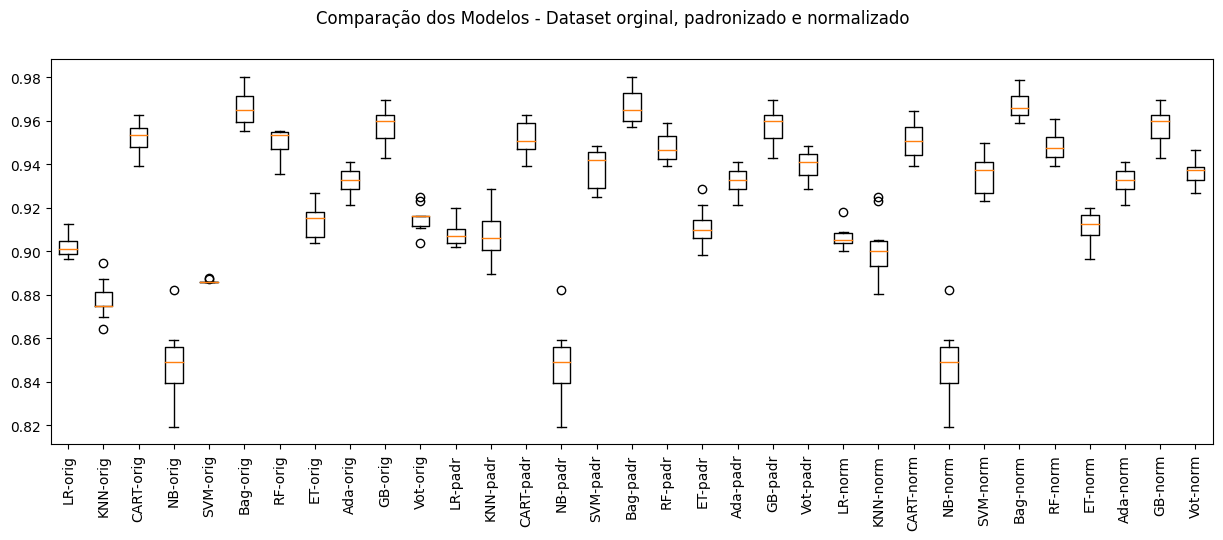

In [14]:
np.random.seed(7) # definindo uma semente global

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,5))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

#####Utilizando-se a biblioteca Grid Search para executar a otimização dos hiperparâmetros do algoritmo KNN, buscando melhores resultados. Para tal, serão utilizados todos os valores ímpares de k entre 1 e 21 e diferentes métricas de distância (euclidean, manhattan e minkowski).

####3.3 - Otimização dos hiperparâmetros

In [15]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.887660 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
Sem tratamento de missings: knn-padr - Melhor: 0.915878 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 17}
Sem tratamento de missings: knn-norm - Melhor: 0.909807 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 11}


#####Após a otimização dos hiperparâmetros do algoritmo KNN, observou-se uma melhora em sua acurácia média, porém, outros modelos apresentaram melhores resultados e, portanto, serão escolhidos para implementação.

###**4. Finalização do Modelo e Avaliação de Resultados**

#####*Objetivo*: Analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)
#####Considerou-se o modelo que alcançou os melhores resultados e, portanto, foi o escolhido para implementação: **árvore de decisão**.
#####Em seguida, o modelo é finalizado, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada), e são feitas predições para o conjunto de dados de teste que foi separado no início, a fim de confirmar os resultados.
#####Primeiro, será realizada a padronização dos dados de entrada, em seguida o modelo será treinado e a acurácia de teste será exibida.


#####Para fins de comparação, será treinado o segundo modelo que melhor performou: **regressão logística**

In [16]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model_LR = LogisticRegression(max_iter=200)
model = DecisionTreeClassifier()
model_LR.fit(rescaledX, y_train)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions_LR = model_LR.predict(rescaledTestX)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions_LR))
print(accuracy_score(y_test, predictions))

0.9083333333333333
0.94875


#####Por meio do conjunto de teste, verificou-se a acurácia alcançada de **94,8%** em dados não vistos para o modelo de árvore de decisão.
#####Esse resultado foi ligeiramente inferior à avaliação na base de treinamento da árvore de decisão, que alcançou acurácia média de **95,2%**.

#####Já para o modelo de regressão logística verificou-se a acurácia de **90,8%** no conjunto de teste.
#####Valor semelhante ao encontrado na avaliação de dados normalizados, para o mesmo modelo.

#####Valores semelhantes à acurácia de teste são esperados quando esse modelo estiver executando em produção e fazendo predições para novos dados.

#####Vamos agora preparar o modelo para utilização em produção. Para isso, vamos treiná-lo com todo o dataset, e não apenas o conjunto de treino.

In [17]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

DecisionTreeClassifier()

###**5. Simulando a Aplicação do Modelo em Dados Não Vistos**

#####Por fim, é realizada a simulação da aplicação do modelo em dados não vistos, considerando três novas instâncias, com classe de saída desconhecidas.
#####Aplica-se, então, o modelo recém-treinado para fazer a predição das classes. Para tal, será necessário antes padronizar os dados utilizando a mesma escala dos dados usados no treinamento do modelo.

In [18]:
# Novos dados - não sabemos a classe!
data = {'aluminium': [1.78, 2.21, 1.44],
        'ammonia':  [20.8, 17.3, 22.5],
        'arsenic': [0.04, 0.05, 0.03],
        'barium': [2.32, 1.28, 0.95],
        'cadmium': [0.005, 0.006, 0.007],
        'chloramine': [3.86, 5.17, 4.38],
        'chromium': [0.52, 0.78, 0.49],
        'copper': [0.18, 0.62, 1.10],
        'flouride': [0.75, 0.80, 0.92],
        'bacteria': [0.60, 0.20, 0.15],
        'viruses': [0.05, 0.12, 0.40],
        'lead': [0.10, 0.07, 0.13],
        'nitrates': [4.15, 12.4, 8.10],
        'nitrites': [1.12, 1.20, 1.04],
        'mercury': [0.005, 0.003, 0.006],
        'perchlorate': [34.1, 42.2, 19.7],
        'radium': [3.15, 6.45, 2.86],
        'selenium': [0.05, 0.08, 0.02],
        'silver': [0.15, 0.40, 0.32],
        'uranium': [0.05, 0.04, 0.06]}

atributos = ['aluminium', 'ammonia','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','bacteria','viruses','lead','nitrates','nitrites','mercury','perchlorate','radium','selenium','silver','uranium']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:20].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.88   0.735 -0.481  0.619 -1.049  0.656  1.008 -0.958 -0.05   0.851
  -0.737  0.009 -1.023 -0.366 -0.065  0.997  0.099  0.011  0.015  0.198]
 [ 1.22   0.341 -0.441 -0.237 -1.021  1.166  1.969 -0.284  0.065 -0.363
  -0.552 -0.506  0.466 -0.227 -0.739  1.455  1.519  1.054  1.757 -0.174]
 [ 0.612  0.926 -0.52  -0.508 -0.993  0.858  0.897  0.45   0.341 -0.515
   0.189  0.525 -0.31  -0.506  0.272  0.183 -0.026 -1.032  1.2    0.57 ]]


#####Realiza-se a predição das classes para os novos dados.

In [19]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 0. 1.]


#####Observa-se que, para as três novas instâncias, foram obtidos resultados de qualidade da água "segura", "não segura" e "segura", respectivamente.

###**6. Conclusão**

#####O presente projeto consistiu em analisar uma base de dados de qualidade de água, de modo a verificar se a mesma é segura ou não segura para consumo. Ressalta-se que os dados utilizados são imaginários, assim como não foram considerados, no presente estudo, valores de referência de órgãos reguladores.
#####Inicialmente foi realizada uma seleção de atributos, onde foram identificados quatro atributos de maior relevância para a base utilizada. Porém, ao realizar a modelagem e inferência dos dados utilizando-se apenas esses quatro atributos, foi obtida acurácia de 100% para todos os modelos analisados. Dessa forma, considerou-se que ocorreu um overfitting dos dados e decidiu-se por utilizar a base completa, com todos os atributos, para o presente projeto.
#####Em relação à modelagem e inferência, utilizando-se a validação cruzada para treinar e avaliar os modelos com a métrica "acurácia", observou-se que os modelos que melhor perfomaram foram a árvore de decisão e a regressão logística.
#####Ao avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (de forma a se evitar o data leakage), observou-se que não houve variação significativa da acurácia em relação aos modelos originais.
#####Foi realizada uma otimização dos hiperparâmetros do algoritmo KNN, visando resultados melhores para o referido modelo, porém, apesar de ter sido observada uma melhora em sua acurácia média, outros modelos apresentaram melhores resultados e, portanto, foram escolhidos para implementação.
#####Escolheu-se para implementação o modelo que alcançou os melhores resultados, árvore de decisão. Para fins de comparação, foi treinado, também, o segundo modelo que melhor performou, regressão logística.
#####Por meio do conjunto de teste, verificou-se a acurácia alcançada de 94,8% em dados não vistos para o modelo de árvore de decisão, resultado ligeiramente inferior à avaliação anterior da árvore de decisão, que alcançou acurácia média de 95,2%.
#####Por fim, realizou-se a simulação da aplicação do modelo em dados não vistos, considerando três novas instâncias. Obteve-se resultados de saída satisfatórios, condizentes com os dados das novas instâncias inseridos e com as premissas dos valores considerados perigosos à saúde humana.
